# Hướng Dẫn Các Bước Tiền Xử Lý Dữ Liệu bằng Scikit-Learn
link : https://www.youtube.com/watch?v=VsXKtjddXWY&t=2202s

In [54]:
import pandas as pd
import numpy as np

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

## import dataset

In [56]:
data_df = pd.read_csv('./data.csv')

In [57]:
data_df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


## Data imputation(missing data replacement)

In [58]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [59]:
for col in data_df.columns:
    missing_data = data_df[col].isna().sum()
    missing_percent = missing_data/len(data_df)*100
    print(f'column {col}: has {missing_percent}% missing data')

column Country: has 0.0% missing data
column Age: has 10.0% missing data
column Salary: has 10.0% missing data
column Purchased: has 0.0% missing data


<AxesSubplot:>

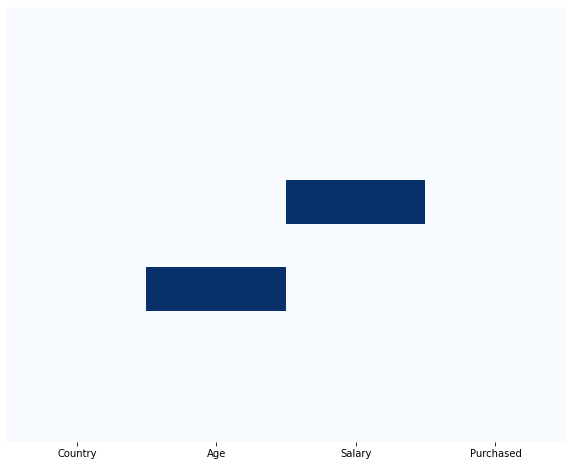

In [60]:
fig, ax =plt.subplots(figsize=(10,8))
sns.heatmap(data_df.isna(),cmap='Blues',cbar=False,yticklabels=False)

In [61]:
data_df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [62]:
X = data_df.iloc[:,:-1].values

In [63]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [64]:
y = data_df.iloc[:,-1:].values

In [65]:
y

array([['No'],
       ['Yes'],
       ['No'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['No'],
       ['Yes']], dtype=object)

In [66]:
from sklearn.impute import SimpleImputer


In [67]:
# create an instance of class simpleimputer: np.nan is the empty value in the dataset
imputer = SimpleImputer(missing_values= np.nan, strategy='mean')


In [68]:
imputer.fit(X[:,1:3])
X[:,1:3] = imputer.transform(X[:,1:3])

In [69]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

## encode catgoricall data
### encode independent varibale(X)

In [70]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [71]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
X = ct.fit_transform(X)

In [72]:
X

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

### encode dependent varible(y)

In [73]:
y

array([['No'],
       ['Yes'],
       ['No'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['No'],
       ['Yes']], dtype=object)

In [74]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [75]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

## Splitting the dataset(X=data,y=output) into the training set and test set

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [78]:
X_train

array([[1.0, 0.0, 0.0, 35.0, 58000.0],
       [1.0, 0.0, 0.0, 44.0, 72000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0]], dtype=object)

In [79]:
X

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [80]:
y_train

array([1, 0, 1, 0, 1, 1, 0, 0])

In [81]:
X_test

array([[0.0, 1.0, 0.0, 50.0, 83000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0]], dtype=object)

In [82]:
y_test

array([0, 1])

## feature scaling (co dan du lieu)

https://github.com/CodexploreRepo/data_science/blob/main/Pages/P01_Data_Pre_Processing.md#feature-scaling

In [83]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:,3:])

In [84]:
X_train

array([[1.0, 0.0, 0.0, -0.7529426005471072, -0.6260377781240918],
       [1.0, 0.0, 0.0, 1.008453807952985, 1.0130429500553495],
       [1.0, 0.0, 0.0, 1.7912966561752484, 1.8325833141450703],
       [0.0, 1.0, 0.0, -1.7314961608249362, -1.0943465576039322],
       [1.0, 0.0, 0.0, -0.3615211764359756, 0.42765697570554906],
       [0.0, 1.0, 0.0, 0.22561095973072184, 0.05040823668012247],
       [0.0, 0.0, 1.0, -0.16581046438040975, -0.27480619351421154],
       [0.0, 0.0, 1.0, -0.013591021670525094, -1.3285009473438525]],
      dtype=object)

In [85]:
X_test[:,3:] = sc.transform(X_test[:,3:])

In [86]:
X_test

array([[0.0, 1.0, 0.0, 2.1827180802863797, 2.3008920936249107],
       [0.0, 0.0, 1.0, -2.3186282969916334, -1.7968097268236927]],
      dtype=object)

# Scikit-Learn Tutorial | Machine Learning With Scikit-Learn | Sklearn | Python Tutorial | Simplilearn

link:https://www.youtube.com/watch?v=0Lt9w-BxKFQ

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split


In [3]:
#loading dataset
wine = pd.read_csv('file csv/winequality-red.csv',sep=';')

In [4]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine.index

RangeIndex(start=0, stop=1599, step=1)

In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
#preprocessing data
bins=(2,6.5,8)
group_names = ['bad','good']
wine['quality'] = pd.cut(wine['quality'],bins=bins,labels = group_names)
wine['quality'].unique()

['bad', 'good']
Categories (2, object): ['bad' < 'good']

In [11]:
label_quality = LabelEncoder()

In [12]:
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [13]:
wine.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [14]:
wine.loc[(wine.quality == 1)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.00,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.50,1
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.50,1
37,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.70,1
62,7.5,0.52,0.16,1.9,0.085,12.0,35.0,0.99680,3.38,0.62,9.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1541,7.4,0.25,0.29,2.2,0.054,19.0,49.0,0.99666,3.40,0.76,10.90,1
1544,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.20,1
1549,7.4,0.36,0.30,1.8,0.074,17.0,24.0,0.99419,3.24,0.70,11.40,1
1555,7.0,0.56,0.17,1.7,0.065,15.0,24.0,0.99514,3.44,0.68,10.55,1


In [15]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

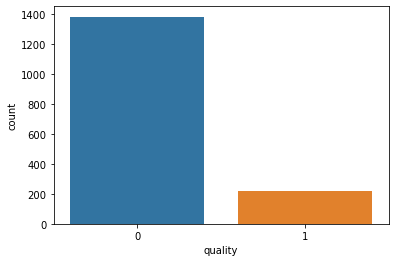

In [16]:
sns.countplot(wine['quality'])

In [17]:
#now seperate the dataset as response varible and feature varibales
x = wine.drop('quality',axis=1)
y=wine['quality']

In [18]:
#train and test splitting of data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
# applying standard scaling to get optimized result
sc = StandardScaler()
x_train = sc.fit_transform(x_train)

In [20]:
x_test = sc.transform(x_test)

In [21]:
x_test[7:9]

array([[-0.76799389,  1.39192973, -0.98515296, -0.38702766,  0.09230795,
        -0.5699679 , -0.83990056, -0.63279954,  0.57386907, -1.08873281,
        -0.39732678],
       [-0.07176411, -0.78434707,  0.55038423, -0.7354043 , -0.61744222,
        -0.5699679 , -0.53621763, -0.30938702, -0.33548487,  0.45822284,
        -0.58738978]])

## random forest classifier

In [1]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
pred_rfc = rfc.predict(x_test)

NameError: name 'RandomForestClassifier' is not defined

In [63]:
#let's see how our model preform
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       273
           1       0.71      0.51      0.59        47

    accuracy                           0.90       320
   macro avg       0.81      0.74      0.77       320
weighted avg       0.89      0.90      0.89       320



![title](123.png)

In [64]:
print(confusion_matrix(y_test,pred_rfc))

[[263  10]
 [ 23  24]]


In [65]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, pred_rfc))

Accuracy: 0.896875


In [66]:
rfc.predict([[-0.07176411, -0.78434707,  0.55038423, -0.7354043 , -0.61744222,
        -0.5699679 , -0.53621763, -0.30938702, -0.33548487,  0.45822284,
        -0.58738978]])

array([0])

### confusion_matrix 
link :https://math2it.com/hieu-confusion-matrix/

## SVM classifier

In [22]:
import sklearn
clf = sklearn.svm.SVC()
clf.fit(x_train,y_train)
pred_clf = clf.predict(x_test)


In [23]:
print(classification_report(y_test,pred_clf))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



In [24]:
clf.predict([[-0.07176411, -0.78434707,  0.55038423, -0.7354043 , -0.61744222,
        -0.5699679 , -0.53621763, -0.30938702, -0.33548487,  0.45822284,
        -0.58738978]])

array([0], dtype=int64)

In [26]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, pred_clf))

Accuracy: 0.875


## Neural Network

In [74]:
mlpc = MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=500)
mlpc.fit(x_train,y_train)
pred_mlpc = mlpc.predict(x_test)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [75]:
print(classification_report(y_test,pred_mlpc))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       273
           1       0.65      0.47      0.54        47

    accuracy                           0.88       320
   macro avg       0.78      0.71      0.74       320
weighted avg       0.87      0.88      0.88       320



In [76]:
print(confusion_matrix(y_test,pred_mlpc))

[[261  12]
 [ 25  22]]


In [77]:
from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test,pred_rfc)
cm

0.896875

In [79]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [89]:
xnew = [[7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0]]
xnew = sc.transform(xnew)
ynew = rfc.predict(xnew)
ynew

array([1])

In [90]:
ynew1= mlpc.predict(xnew)

In [91]:
ynew1

array([0])

In [92]:
ynew2 = clf.predict(xnew)

In [93]:
ynew2

array([0])